In [67]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [68]:
# Load dataset
df = pd.read_csv("/content/StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [69]:
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [70]:
# Drop duplicates
df = df.drop_duplicates()

# Fill numeric columns with mean
num_cols = df.select_dtypes(include=['int64','float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nAfter filling missing values:\n", df.isnull().sum())



After filling missing values:
 Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


In [71]:
# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, drop_first=True)
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,True,False,True,False,False,True,True
1,19,64,8,59,2,4,61,True,False,False,...,True,True,False,False,False,False,False,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,True,True,True,False,False,False,True,False,True,True
3,29,89,8,98,1,4,71,True,False,False,...,True,True,False,False,False,True,False,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,True,True,False,False,False,False,False,True,False


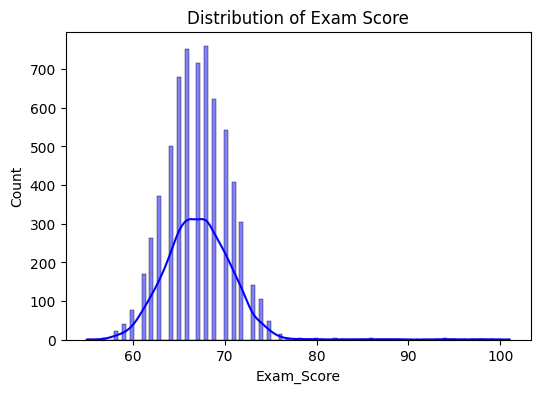

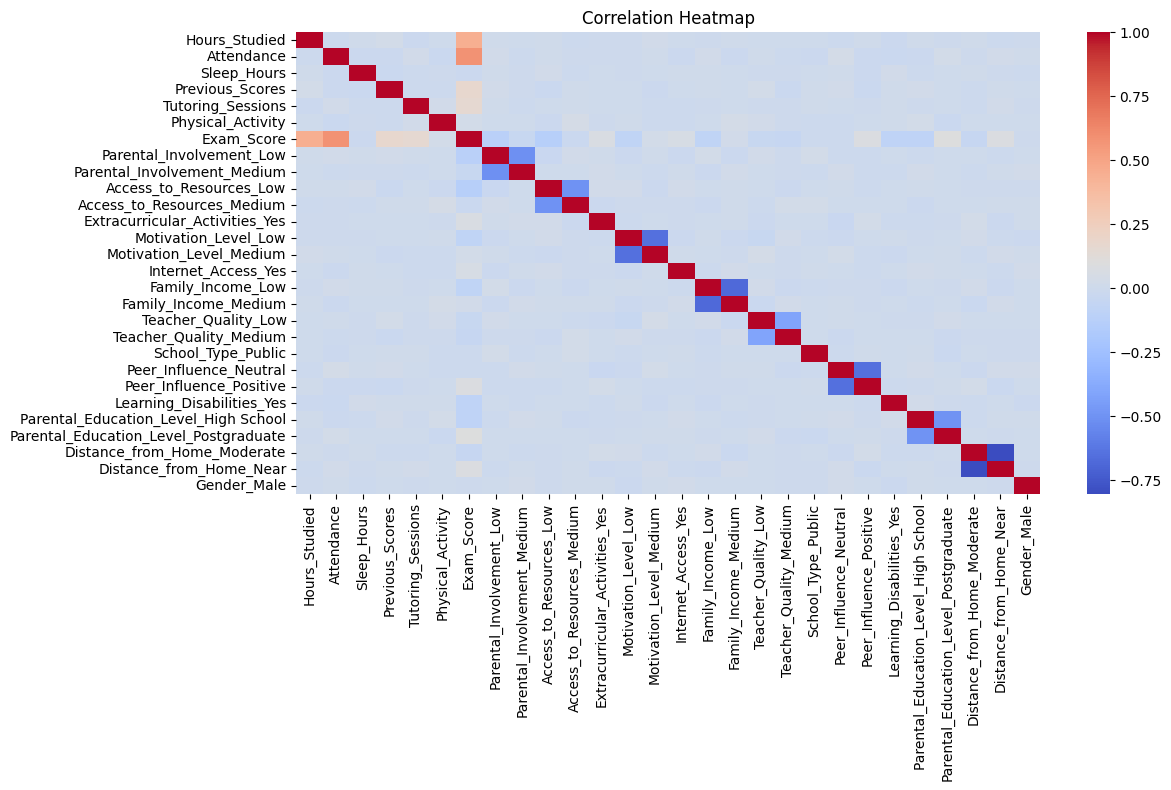

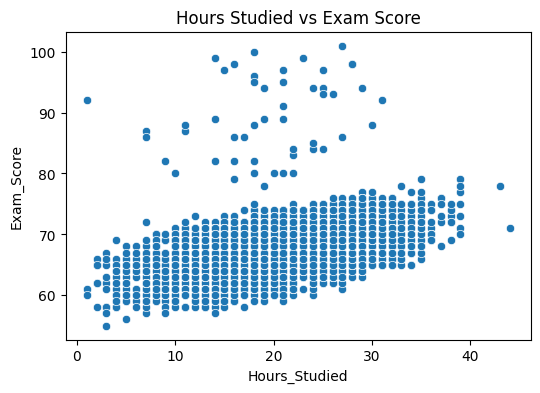

In [72]:
# Target distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Exam_Score"], kde=True, color="blue")
plt.title("Distribution of Exam Score")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example: Hours Studied vs Exam Score
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["Hours_Studied"], y=df["Exam_Score"])
plt.title("Hours Studied vs Exam Score")
plt.show()


Exam_Score                               1.000000
Attendance                               0.581072
Hours_Studied                            0.445455
Previous_Scores                          0.175079
Tutoring_Sessions                        0.156525
Parental_Education_Level_Postgraduate    0.093764
Peer_Influence_Positive                  0.081217
Distance_from_Home_Near                  0.080933
Extracurricular_Activities_Yes           0.064382
Internet_Access_Yes                      0.051475
Physical_Activity                        0.027824
Motivation_Level_Medium                  0.024771
Family_Income_Medium                     0.020995
Gender_Male                             -0.002032
Peer_Influence_Neutral                  -0.007795
School_Type_Public                      -0.008844
Sleep_Hours                             -0.017022
Access_to_Resources_Medium              -0.026158
Parental_Involvement_Medium             -0.035978
Teacher_Quality_Low                     -0.041192


/tmp/ipython-input-1889721701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette="viridis")


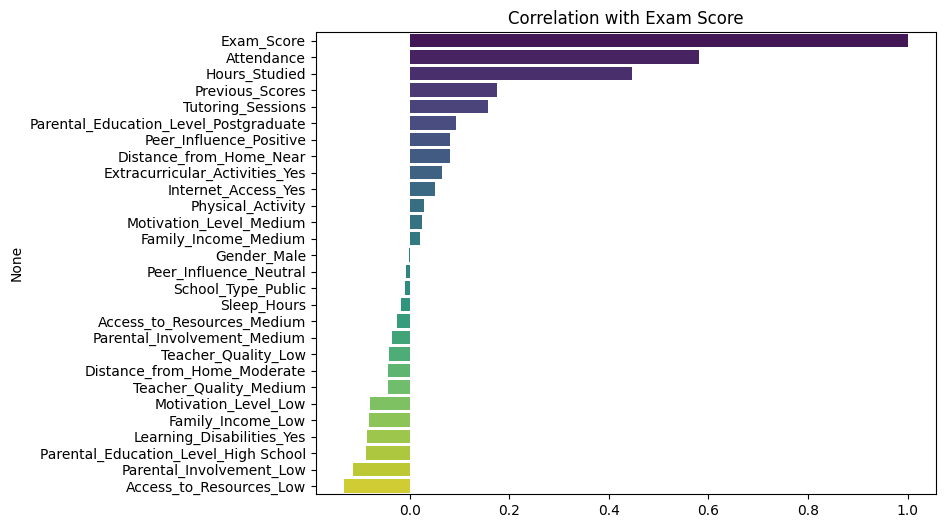

In [73]:
# Correlation with Exam_Score
corr = df.corr()["Exam_Score"].sort_values(ascending=False)
print(corr)

plt.figure(figsize=(8,6))
sns.barplot(x=corr.values, y=corr.index, palette="viridis")
plt.title("Correlation with Exam Score")
plt.show()


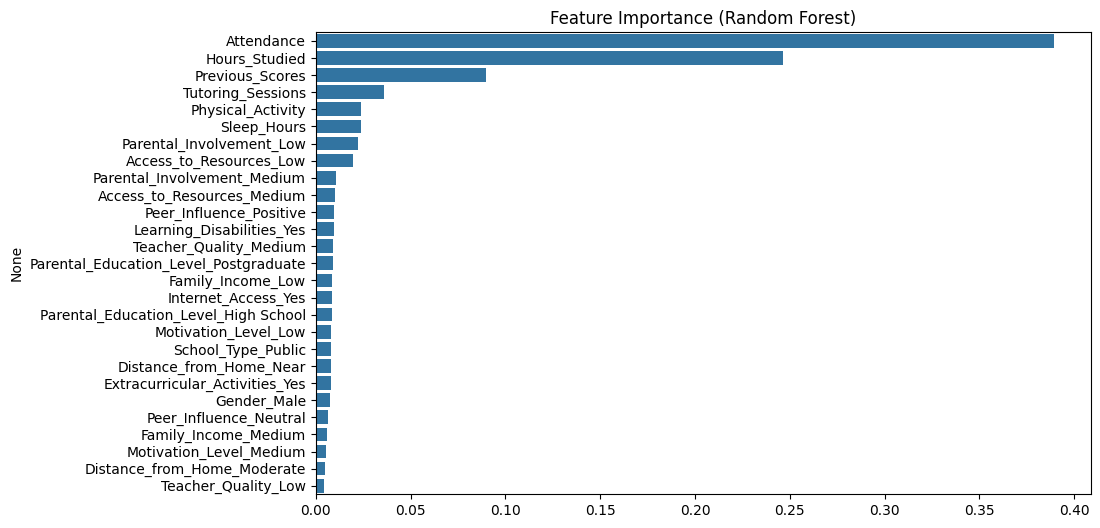

In [74]:
from sklearn.ensemble import RandomForestRegressor

X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()


In [75]:
top_features = X.columns[indices][:5]
print("Top 5 Features:", top_features)

X_selected = X[top_features]


Top 5 Features: Index(['Attendance', 'Hours_Studied', 'Previous_Scores', 'Tutoring_Sessions',
       'Physical_Activity'],
      dtype='object')


In [76]:
# Separate features (X) and target (y)
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (6607, 27)
Shape of y: (6607,)


In [77]:
# Standardization (better for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [79]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

R2 Score: 0.7696495724907312
MAE: 0.4523920089625958
MSE: 3.2560199870428943
RMSE: 1.804444509272284
Accuracy: 76.96%


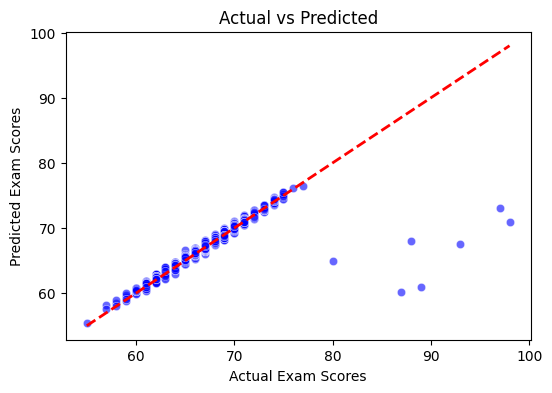

In [80]:
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

accuracy = r2_score(y_test, y_pred) * 100
print(f"Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)

# Regression line y = x
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", linewidth=2)

plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores")
plt.title("Actual vs Predicted")
plt.show()



In [81]:
print(df.columns)


Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score',
       'Parental_Involvement_Low', 'Parental_Involvement_Medium',
       'Access_to_Resources_Low', 'Access_to_Resources_Medium',
       'Extracurricular_Activities_Yes', 'Motivation_Level_Low',
       'Motivation_Level_Medium', 'Internet_Access_Yes', 'Family_Income_Low',
       'Family_Income_Medium', 'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'School_Type_Public', 'Peer_Influence_Neutral',
       'Peer_Influence_Positive', 'Learning_Disabilities_Yes',
       'Parental_Education_Level_High School',
       'Parental_Education_Level_Postgraduate', 'Distance_from_Home_Moderate',
       'Distance_from_Home_Near', 'Gender_Male'],
      dtype='object')


=== Polynomial Regression ===
R2 Score (Poly): 0.747120576647264
MAE (Poly): 0.6416656289894119
MSE (Poly): 3.574468976035476
RMSE (Poly): 1.890626609364069
Accuracy (Poly): 74.71%


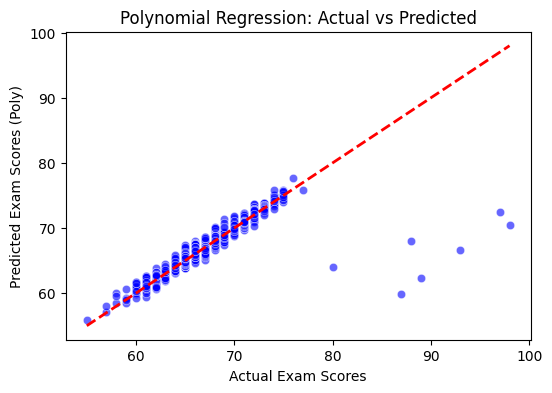


=== Feature Experimentation ===
R2 Score (Experiment): 0.766433041620411
MAE (Experiment): 0.5020026546445707
MSE (Experiment): 3.301485884006691
RMSE (Experiment): 1.8169991425442915
Accuracy (Experiment): 76.64%


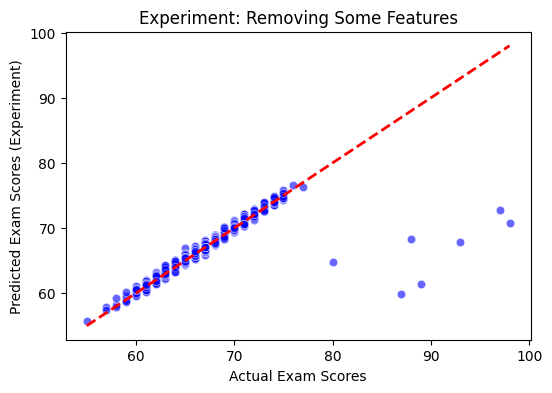

In [83]:
#compare with polynomial regretion

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# -------- 1. Polynomial Regression --------
print("=== Polynomial Regression ===")

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)

print("R2 Score (Poly):", r2_score(y_test, y_poly_pred))
print("MAE (Poly):", mean_absolute_error(y_test, y_poly_pred))
print("MSE (Poly):", mean_squared_error(y_test, y_poly_pred))
print("RMSE (Poly):", np.sqrt(mean_squared_error(y_test, y_poly_pred)))
print(f"Accuracy (Poly): {r2_score(y_test, y_poly_pred)*100:.2f}%")

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_poly_pred, color="blue", alpha=0.6)

# Regression line (ideal y = x)
max_val = max(y_test.max(), y_poly_pred.max())
min_val = min(y_test.min(), y_poly_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", linewidth=2)

plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores (Poly)")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.show()


# -------- 2. Feature Experimentation --------
print("\n=== Feature Experimentation ===")

# Example: remove 'Sleep_Hours' and 'Extracurricular_Activities'
X_exp = df.drop(["Exam_Score", "Sleep_Hours", "Extracurricular_Activities_Yes"], axis=1)
y_exp = df["Exam_Score"]

# Scale again
X_exp_scaled = scaler.fit_transform(X_exp)

X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_exp_scaled, y_exp, test_size=0.2, random_state=42
)

exp_model = LinearRegression()
exp_model.fit(X_train_exp, y_train_exp)

y_exp_pred = exp_model.predict(X_test_exp)

print("R2 Score (Experiment):", r2_score(y_test_exp, y_exp_pred))
print("MAE (Experiment):", mean_absolute_error(y_test_exp, y_exp_pred))
print("MSE (Experiment):", mean_squared_error(y_test_exp, y_exp_pred))
print("RMSE (Experiment):", np.sqrt(mean_squared_error(y_test_exp, y_exp_pred)))
print(f"Accuracy (Experiment): {r2_score(y_test_exp, y_exp_pred)*100:.2f}%")

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test_exp, y=y_exp_pred, color="blue", alpha=0.6)

# Regression line (ideal y = x)
max_val = max(y_test_exp.max(), y_exp_pred.max())
min_val = min(y_test_exp.min(), y_exp_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", linewidth=2)

plt.xlabel("Actual Exam Scores")
plt.ylabel("Predicted Exam Scores (Experiment)")
plt.title("Experiment: Removing Some Features")
plt.show()
